# Loading data and imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import ravel
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import seaborn as sns; sns.set_theme()

enem_df = pd.read_csv("MICRODADOS_ENEM_2019.csv",nrows=500000, encoding='latin-1', sep=';')
enem_df

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,190001267353,2019,2933604,Xique-Xique,29,BA,21.0,F,1,2,...,A,A,A,A,A,A,B,A,A,A
499996,190001045301,2019,1302603,Manaus,13,AM,24.0,M,1,3,...,B,A,A,B,B,B,E,A,A,B
499997,190001373185,2019,2611101,Petrolina,26,PE,24.0,F,1,2,...,A,A,A,B,A,A,E,A,A,B
499998,190001270915,2019,2927408,Salvador,29,BA,32.0,F,1,3,...,B,A,A,B,A,A,C,A,A,A


### Viewing where math grade has correlation > 0.3

In [2]:
enem_corr = enem_df.corr()

In [3]:
enem_corr[enem_corr["NU_NOTA_MT"].abs()>0.3]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
NU_NOTA_CN,0.097690,NaN,0.106401,0.105355,-0.036166,-0.021607,-0.162434,-0.041477,0.112136,0.111062,...,0.633136,-0.223119,-0.090762,0.426682,0.412603,0.460820,0.438352,0.445224,0.500329,-0.088553
NU_NOTA_CH,0.108380,NaN,0.114461,0.113409,-0.021965,-0.016158,-0.164482,-0.046017,0.119272,0.118192,...,0.595113,-0.221384,-0.144922,0.464020,0.439021,0.489339,0.458130,0.473208,0.529105,-0.093561
NU_NOTA_LC,0.131919,NaN,0.133545,0.132305,-0.079971,-0.032406,-0.170471,-0.047310,0.138333,0.137060,...,0.575682,-0.238168,-0.163870,0.480948,0.431946,0.489132,0.455213,0.469818,0.528671,-0.097415
NU_NOTA_MT,0.097163,NaN,0.108645,0.107485,-0.117242,-0.042149,-0.165892,-0.038319,0.117600,0.116400,...,1.000000,-0.228650,-0.086362,0.423954,0.402333,0.451347,0.439910,0.433226,0.491858,-0.071814
NU_NOTA_COMP1,0.047790,NaN,0.052434,0.051900,-0.145168,-0.052841,-0.108217,-0.024634,0.059722,0.059125,...,0.423954,-0.147087,-0.596462,1.000000,0.689274,0.772818,0.808779,0.570926,0.841072,-0.052503
NU_NOTA_COMP2,0.018047,NaN,0.023101,0.022677,-0.136091,-0.049983,-0.080948,-0.023863,0.029308,0.028839,...,0.402333,-0.125814,-0.461855,0.689274,1.000000,0.851874,0.731771,0.659334,0.888275,-0.037588
NU_NOTA_COMP3,0.016254,NaN,0.021541,0.021164,-0.148873,-0.056512,-0.093174,-0.028360,0.028772,0.028339,...,0.451347,-0.140323,-0.464878,0.772818,0.851874,1.000000,0.807176,0.708171,0.931223,-0.044408
NU_NOTA_COMP4,0.010711,NaN,0.016380,0.016042,-0.176409,-0.062620,-0.089127,-0.023541,0.024560,0.024154,...,0.439910,-0.131965,-0.513109,0.808779,0.731771,0.807176,1.000000,0.650377,0.889582,-0.035644
NU_NOTA_COMP5,0.016591,NaN,0.024520,0.024119,-0.163617,-0.059646,-0.090245,-0.026543,0.031362,0.030923,...,0.433226,-0.135932,-0.252219,0.570926,0.659334,0.708171,0.650377,1.000000,0.852860,-0.038401
NU_NOTA_REDACAO,0.023297,NaN,0.030074,0.029608,-0.176076,-0.064391,-0.103985,-0.029021,0.038134,0.037609,...,0.491858,-0.154313,-0.491871,0.841072,0.888275,0.931223,0.889582,0.852860,1.000000,-0.046622


### Choosing accordingly

In [4]:
enem_df = enem_df[["NU_NOTA_REDACAO","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]]
enem_df

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,460.0,483.8,503.6,537.3,392.0,120.0,120.0,120.0,100.0,0.0
4,860.0,513.6,575.5,570.7,677.0,160.0,120.0,180.0,200.0,200.0
...,...,...,...,...,...,...,...,...,...,...
499995,540.0,442.5,410.1,535.3,471.3,100.0,120.0,100.0,120.0,100.0
499996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499998,440.0,558.2,506.5,527.6,376.5,120.0,100.0,80.0,80.0,60.0


### Viewing heatmap from correlation

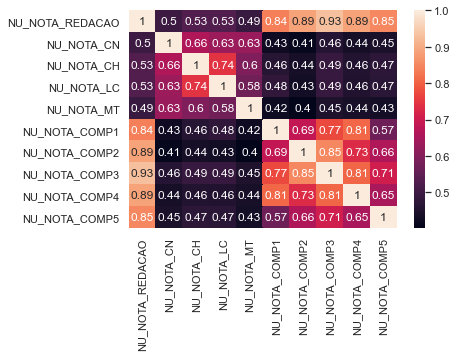

In [5]:
ax = sns.heatmap(enem_df.corr(),annot = True)

### Drop 0 values

In [6]:
mask1 = (enem_df["NU_NOTA_REDACAO"]==0)
mask2 = (enem_df["NU_NOTA_CN"]==0)
mask3 = (enem_df["NU_NOTA_LC"]==0)
mask4 = (enem_df["NU_NOTA_MT"]==0)
mask5 = (enem_df["NU_NOTA_COMP1"]==0)
mask6 = (enem_df["NU_NOTA_COMP2"]==0)
mask7 = (enem_df["NU_NOTA_COMP3"]==0)
mask8 = (enem_df["NU_NOTA_COMP4"]==0)
mask9 = (enem_df["NU_NOTA_COMP5"]==0)

enem_df = enem_df.loc[~mask1]
enem_df = enem_df.loc[~mask2]
enem_df = enem_df.loc[~mask3]
enem_df = enem_df.loc[~mask4]
enem_df = enem_df.loc[~mask5]
enem_df = enem_df.loc[~mask6]
enem_df = enem_df.loc[~mask7]
enem_df = enem_df.loc[~mask8]
enem_df = enem_df.loc[~mask8]

### Changing the null data to the mean and spliting the dataset

In [7]:
x = enem_df.drop(["NU_NOTA_MT"], axis=1)
y = enem_df.NU_NOTA_MT

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=0)

In [9]:
print(f"The train size is: {len(X_train)}")
print(f"The test size is: {len(X_test)}")

The train size is: 440053
The test size is: 48895


In [10]:
X_train = pd.DataFrame(X_train)
X_train.fillna(X_train.mean(),inplace=True)

In [11]:
X_test = pd.DataFrame(X_test)
X_test.fillna(X_test.mean(),inplace=True)

In [12]:
y_train = pd.DataFrame(y_train)
y_train.fillna(y_train.mean(),inplace=True)

In [13]:
y_test = pd.DataFrame(y_test)
y_test.fillna(y_test.mean(),inplace=True)

## Using Machine Learning Algorithms

### Linear regression: Attempts to model the relationship between two variables by fitting a linear equation to observed data. A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable.

### Decision tree: Builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

### Random forest: A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

### Gradient Boosting: Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

### In this case, we used the "regressor" type of theses models and MAE(Mean Absolute Error) to evaluate our model.

In [14]:
def models(Xtrain, ytrain, Xtest, ytest):
    linear_regression = LinearRegression()
    decision_tree = DecisionTreeRegressor()
    random_forest = RandomForestRegressor()
    gradient_boosting = GradientBoostingRegressor()
    
    list_models = [linear_regression,decision_tree,random_forest,gradient_boosting]
    models_str = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "Gradient Boosting Regressor"]
    
    for ml in range(4):
        fit = list_models[ml].fit(X_train, y_train.values.ravel())
        predict = fit.predict(X_test)
        print(f"{models_str[ml]}: {mean_absolute_error(predict, y_test)}\n")
    

In [15]:
models(X_train, y_train, X_test, y_test)

Linear Regression: 47.069741169175636

Decision Tree Regressor: 67.88928781055968

Random Forest Regressor: 51.71788991984845

Gradient Boosting Regressor: 49.25550431177755



## With the smallest MAE, the linear regression algorithm is the one that best trains the model